In [42]:
# Create config column
import pandas as pd
df_by_config = pd.read_pickle('./output/df_metrics')
df_by_config['config'] = df_by_config["in_len"].astype(str) + '_' + df_by_config["out_len"].astype(str)
df_by_config.drop(columns=['in_len','out_len','iteration'])
df_by_config = df_by_config.groupby(['model','checkpoint','config']).mean().reset_index()
df_by_config.head()

,model,checkpoint,config,iteration,time,in_len,out_len,bar_pitch_class_histogram_kl_div,bar_pitch_class_histogram_overlap,bar_used_pitch_kl_div,...,bar_used_note_kl_div,bar_used_note_overlap,avg_pitch_shift_kl_div,avg_pitch_shift_overlap,pitch_range_kl_div,pitch_range_overlap,total_pitch_class_histogram_kl_div,total_pitch_class_histogram_overlap,note_length_hist_kl_div,note_length_hist_overlap
0,melody_rnn,attention_rnn,1_1,4,14.099744,1,1,0.267902,0.701457,0.021906,...,0.197124,0.002925,0.010577,0.827510,0.086720,0.706489,0.319391,0.545219,0.020694,0.529074
1,melody_rnn,attention_rnn,1_2,4,10.951792,1,2,0.508098,0.703588,0.142797,...,0.070082,0.021146,0.038839,0.683168,0.236113,0.609433,0.342217,0.690359,0.084357,0.260483
2,melody_rnn,attention_rnn,1_3,4,13.010351,1,3,0.547798,0.644492,0.060485,...,0.297776,0.001095,0.008805,0.754202,0.028171,0.713234,0.401363,0.611368,0.097824,0.114829
3,melody_rnn,attention_rnn,1_4,4,9.193514,1,4,0.273311,0.695887,0.109500,...,0.278960,0.074112,0.002804,0.755066,0.146547,0.687965,0.365790,0.548802,0.026975,0.127737
4,melody_rnn,attention_rnn,1_5,4,10.324655,1,5,0.483477,0.690870,0.098990,...,0.176313,0.133998,0.015167,0.790984,0.050341,0.706069,0.308410,0.735881,0.015988,0.160636


In [59]:
df_by_config.head()

,model,checkpoint,config,iteration,time,in_len,out_len,bar_pitch_class_histogram_kl_div,bar_pitch_class_histogram_overlap,bar_used_pitch_kl_div,...,pitch_range_kl_div,pitch_range_overlap,total_pitch_class_histogram_kl_div,total_pitch_class_histogram_overlap,note_length_hist_kl_div,note_length_hist_overlap,kl_mean,kl_std,overlap_mean,overlap_std
0,melody_rnn,attention_rnn,1_1,4,14.099744,1,1,0.267902,0.701457,0.021906,...,0.086720,0.706489,0.319391,0.545219,0.020694,0.529074,0.194172,0.199674,0.359803,0.338094
1,melody_rnn,attention_rnn,1_2,4,10.951792,1,2,0.508098,0.703588,0.142797,...,0.236113,0.609433,0.342217,0.690359,0.084357,0.260483,0.255877,0.209281,0.349091,0.325804
2,melody_rnn,attention_rnn,1_3,4,13.010351,1,3,0.547798,0.644492,0.060485,...,0.028171,0.713234,0.401363,0.611368,0.097824,0.114829,0.221027,0.206288,0.316823,0.321898
3,melody_rnn,attention_rnn,1_4,4,9.193514,1,4,0.273311,0.695887,0.109500,...,0.146547,0.687965,0.365790,0.548802,0.026975,0.127737,0.211382,0.173332,0.327925,0.319981
4,melody_rnn,attention_rnn,1_5,4,10.324655,1,5,0.483477,0.690870,0.098990,...,0.050341,0.706069,0.308410,0.735881,0.015988,0.160636,0.143563,0.156453,0.409696,0.358727


In [43]:
# Get Subset DFs
col_metrics = df_by_config.columns
col_kl_divs  = [x for x in col_metrics if x.endswith('kl_div')]
col_overlaps = [x for x in col_metrics if x.endswith('overlap')]

# Calculate KL Divs mean and std per model config
loc_kldivs = df_by_config[['model'] + col_kl_divs].loc[: , "bar_pitch_class_histogram_kl_div":"note_length_hist_kl_div"]
df_by_config['kl_mean'] = loc_kldivs.mean(axis=1)
df_by_config['kl_std'] = loc_kldivs.std(axis=1)
loc_overlaps = df_by_config[['model'] + col_overlaps].loc[: , "bar_pitch_class_histogram_overlap":"note_length_hist_overlap"]
df_by_config['overlap_mean'] = loc_overlaps.mean(axis=1)
df_by_config['overlap_std'] = loc_overlaps.std(axis=1)
df_mean_metrics = df_by_config[['model','checkpoint','config','overlap_mean','overlap_std','kl_mean','kl_std']].copy()


# Print
print(df_mean_metrics)

         model     checkpoint config  overlap_mean  overlap_std   kl_mean  \
0   melody_rnn  attention_rnn    1_1      0.359803     0.338094  0.194172   
1   melody_rnn  attention_rnn    1_2      0.349091     0.325804  0.255877   
2   melody_rnn  attention_rnn    1_3      0.316823     0.321898  0.221027   
3   melody_rnn  attention_rnn    1_4      0.327925     0.319981  0.211382   
4   melody_rnn  attention_rnn    1_5      0.409696     0.358727  0.143563   
5   melody_rnn  attention_rnn    2_1      0.309938     0.305242  0.318510   
6   melody_rnn  attention_rnn    2_2      0.342271     0.366273  0.270329   
7   melody_rnn  attention_rnn    2_3      0.370383     0.381073  0.208633   
8   melody_rnn  attention_rnn    2_4      0.369718     0.355217  0.181511   
9   melody_rnn  attention_rnn    2_5      0.404190     0.383123  0.251422   
10  melody_rnn  attention_rnn    3_1      0.349292     0.326152  0.324161   
11  melody_rnn  attention_rnn    3_2      0.357205     0.354124  0.225133   

<Figure size 432x288 with 0 Axes>

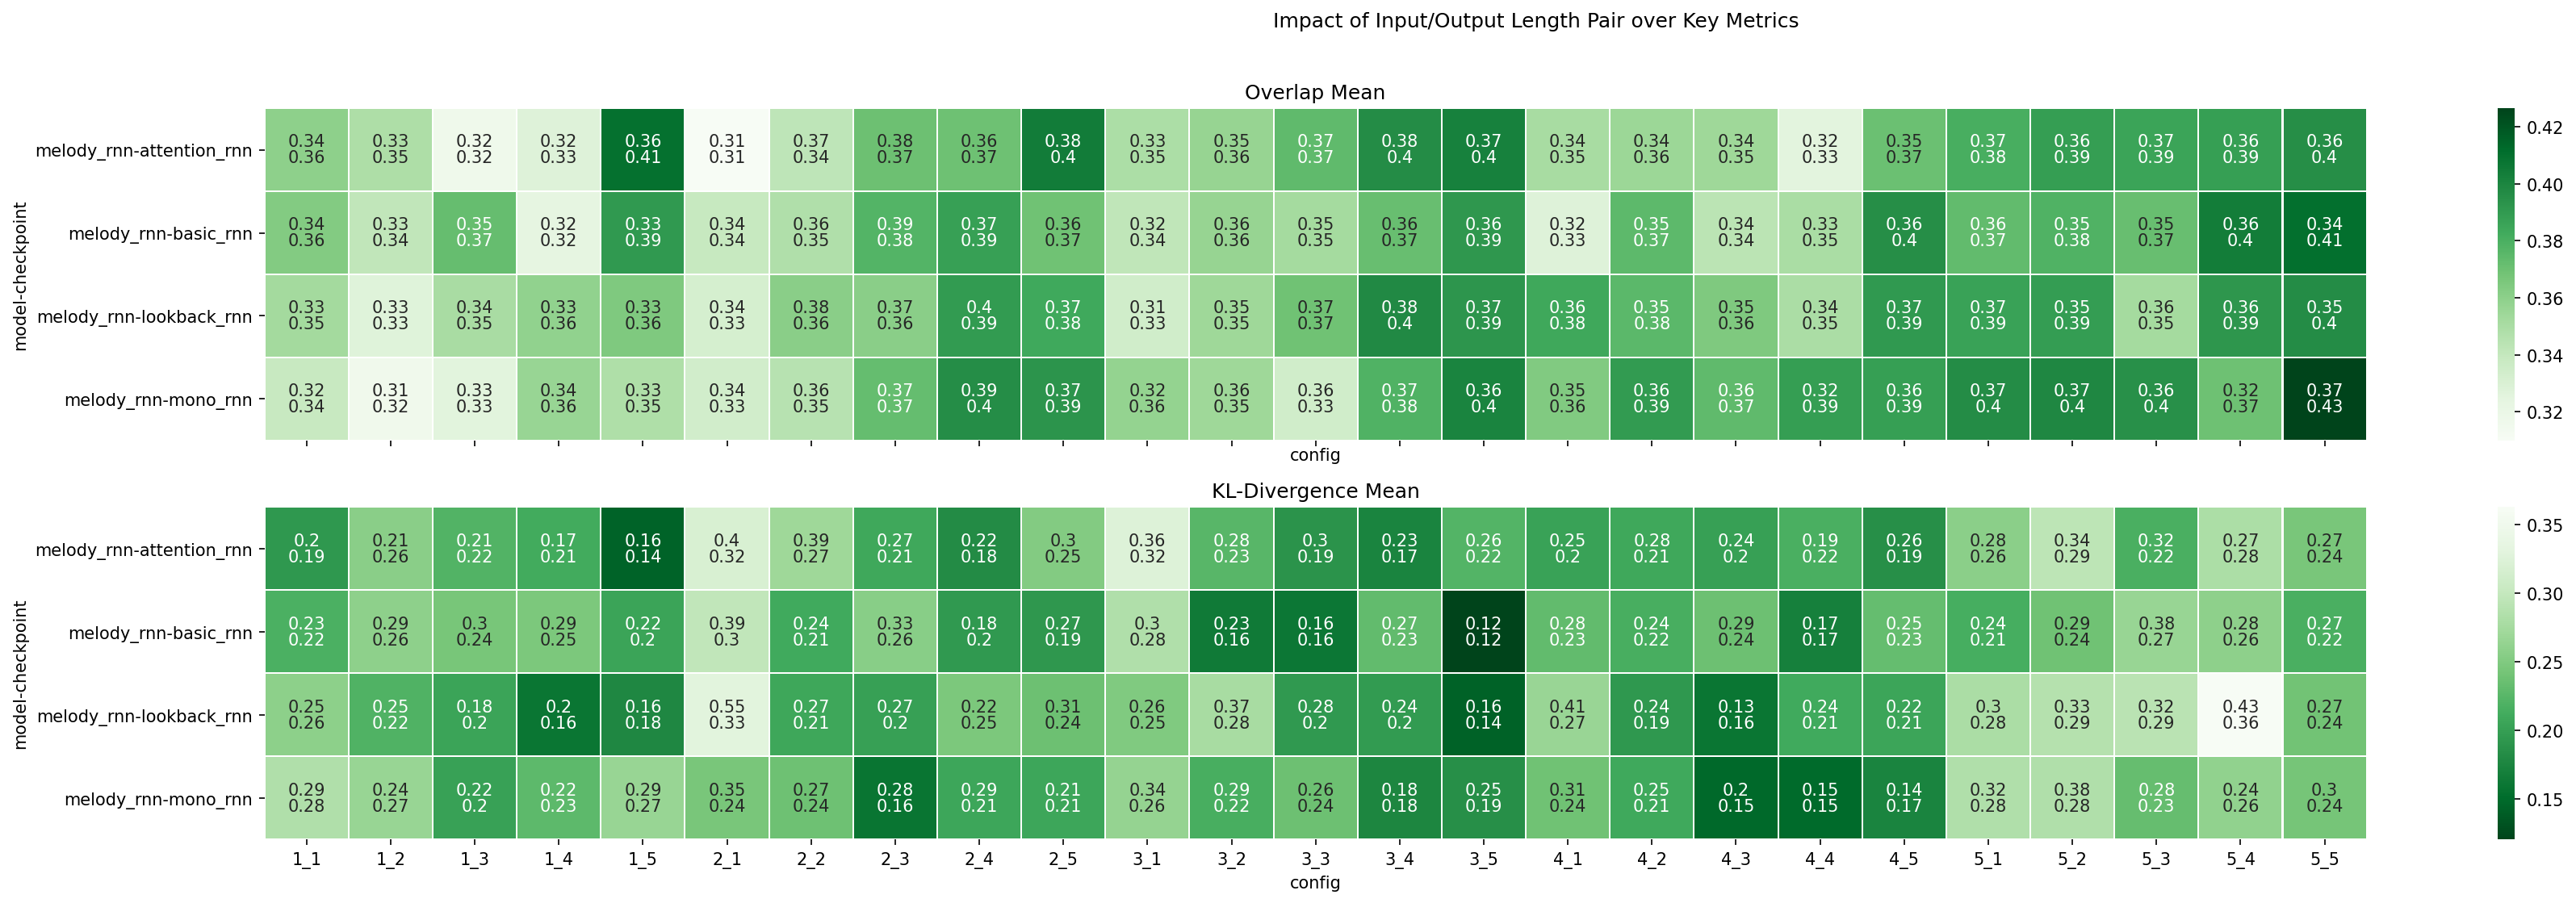

In [58]:
ignore_words = ['std', 'avg', 'kl', 'div', 'overlap']
def filter_metric_names(list_):
    return ['_'.join([x for x in name.split('_') if x not in ignore_words]) for name in list_]

# Define which plots to make
plots_to_make = (
    [ None
    # , 'time_heatmap_per_model'
    # , 'kldiv_per_model'
    # , 'overlap_per_model'
    # , 'time_per_length'
    # , 'time_ratio_per_length'
    # , 'time_per_length_shared' # TODO: Before doing this, check if there's a correlation

    # , 'time_per_length_shared'
    , 'parallel_coordinates_all_configs'
    , 'parallel_coordinates_average'
    , 'parallel_coordinates_best_of_each'
    , 'heatmap_metric_per_config'
    , 'heatmap_metrics_per_model_config'
    ]
)

import math

if 'heatmap_metrics_per_model_config' in plots_to_make:
    # # Copy and prepare DataFrame
    # df_by_config = df.copy()
    # df_by_config['config'] = df_by_config["in_len"].astype(str) + '_' + df_by_config["out_len"].astype(str)
    # df_by_config.drop(columns=['in_len','out_len'])
    # # df_by_config.drop(columns=['in_len','out_len','iteration'])
    # df_by_config = df_by_config.groupby(['model','checkpoint','config']).mean().reset_index()
# 
    # # Get Subset DFs
    # col_metrics = df_by_config.columns
    # col_kl_divs  = [x for x in col_metrics if x.endswith('kl_div_avg')]
    # col_overlaps = [x for x in col_metrics if x.endswith('overlap_avg')]
    # print(df_by_config['config'].unique())
# 
    # # Calculate KL Divs and Overlap mean and std per model config
    # loc_kldivs = df_by_config[['model'] + col_kl_divs].loc[: , "bar_pitch_class_histogram_kl_div_avg":"note_length_hist_kl_div_avg"]
    # df_by_config['kl_mean'] = loc_kldivs.mean(axis=1)
    # df_by_config['kl_std'] = loc_kldivs.std(axis=1)
    # loc_overlaps = df_by_config[['model'] + col_overlaps].loc[: , "bar_pitch_class_histogram_overlap_avg":"note_length_hist_overlap_avg"]
    # df_by_config['overlap_mean'] = loc_overlaps.mean(axis=1)
    # df_by_config['overlap_std'] = loc_overlaps.std(axis=1)
    # df_by_config = df_by_config[['model','checkpoint','config','overlap_mean','overlap_std','kl_mean','kl_std']]


    subplots = (
        [ ('overlap_mean', 'overlap_std', 'Overlap Mean')
        , ('kl_mean'     , 'kl_std'     , 'KL-Divergence Mean')
        ]
    )

    # Generate Plot
    plt.figure()
    fig, axs = plt.subplots(2, figsize=(28,8), sharex='col', sharey='row', dpi=150)
    fig.suptitle('Impact of Input/Output Length Pair over Key Metrics')
    gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)
    tmp_df = df_mean_metrics.copy()
    
    for i, (column_mean, column_std, title) in enumerate(subplots):
        # tmp_df[column_std] = '(±' + tmp_df[column_std].astype(str) + ')'
        cmap = ['Greens', 'Greens_r'][i]
        
        # Straight
        mean_df = pd.pivot_table(tmp_df, values=column_mean, index=['model', 'checkpoint'], columns=['config'])
        std_df = pd.pivot_table(tmp_df, values=column_std, index=['model', 'checkpoint'], columns=['config'])

        ax = axs[i]
        ax.set_title(title)
        sns.heatmap(mean_df, annot=True,   cmap=cmap, linewidths=0.5, ax=ax, annot_kws={'va':'top'})
        sns.heatmap(mean_df, annot=std_df, cmap=cmap, linewidths=0.5, ax=ax, annot_kws={'va':'bottom'}, cbar=False)

    plt.savefig('output/images/metric_mean_std_config_heatmap.png')
    plt.show()

Index(['bar_pitch_class_histogram', 'bar_used_pitch', 'total_used_note',
       'note_length_transition_matrix', 'pitch_class_transition_matrix',
       'total_used_pitch', 'IOI', 'bar_used_note', 'pitch_shift',
       'pitch_range', 'total_pitch_class_histogram', 'note_length_hist',
       'element'],
      dtype='object')
Index(['bar_pitch_class_histogram', 'bar_used_pitch', 'total_used_note',
       'note_length_transition_matrix', 'pitch_class_transition_matrix',
       'total_used_pitch', 'IOI', 'bar_used_note', 'pitch_shift',
       'pitch_range', 'total_pitch_class_histogram', 'note_length_hist',
       'element'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

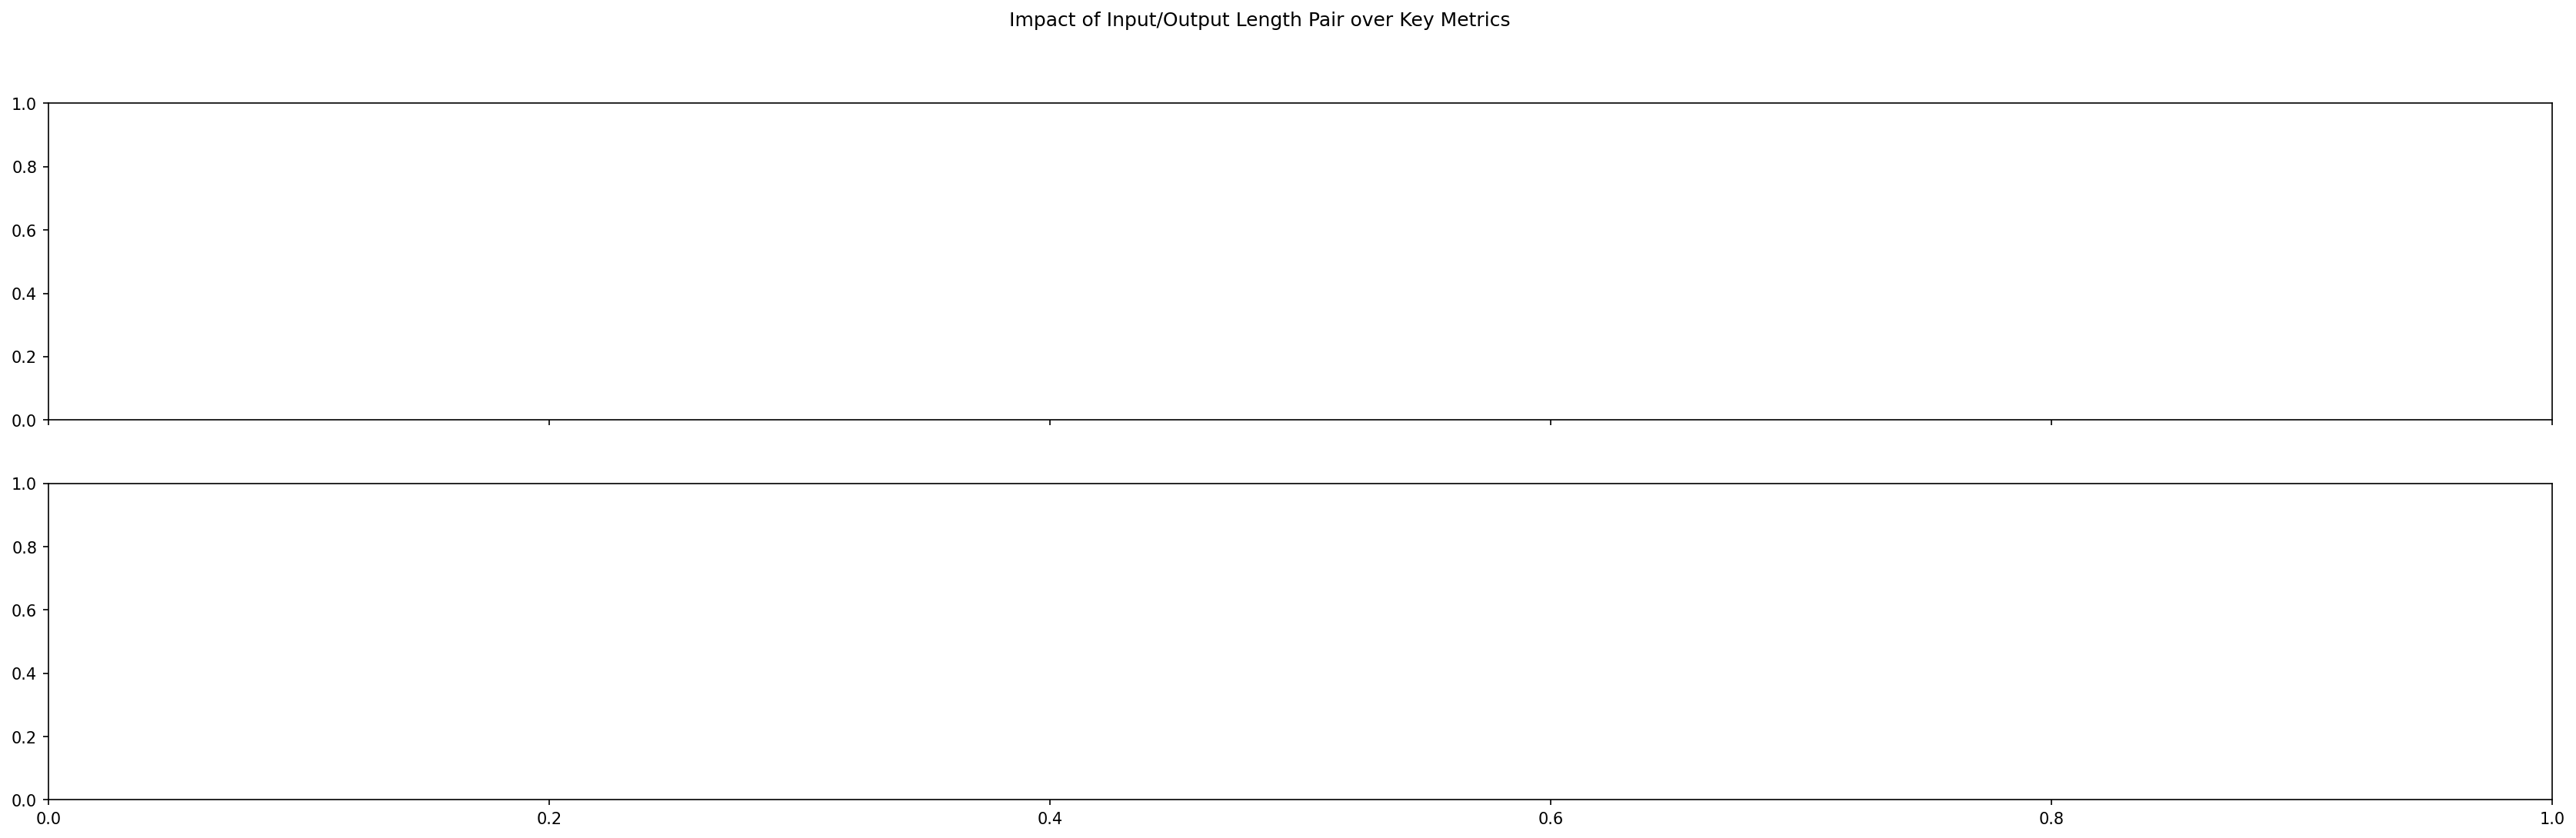

<Figure size 1200x900 with 0 Axes>

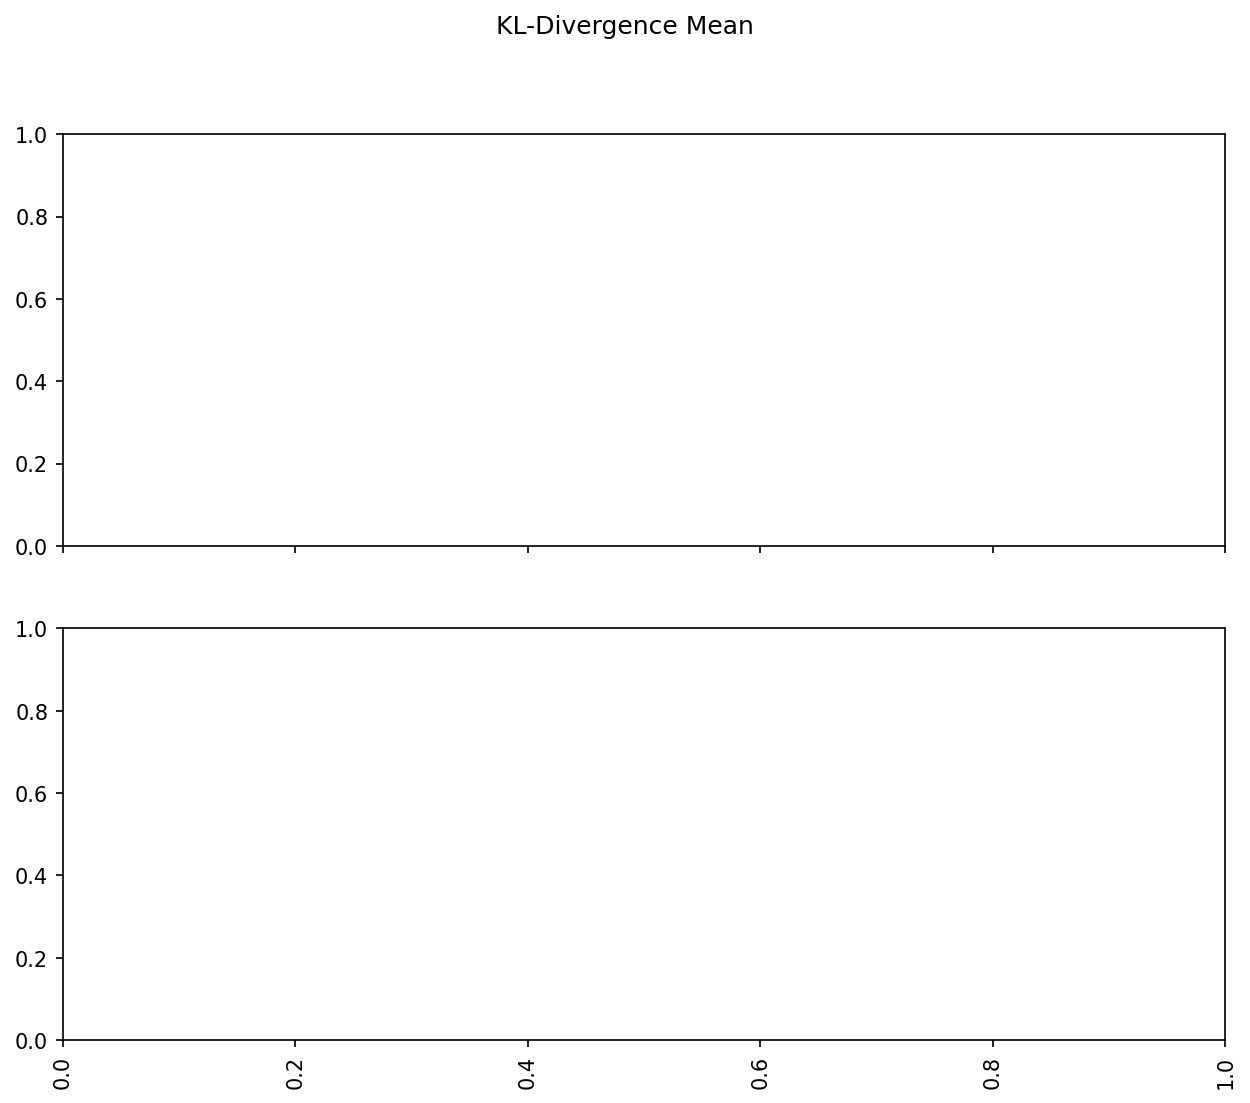

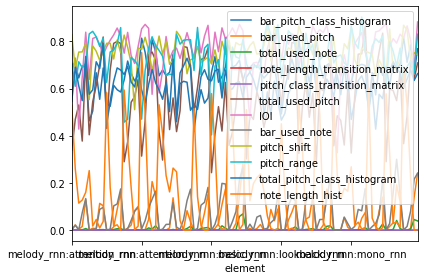

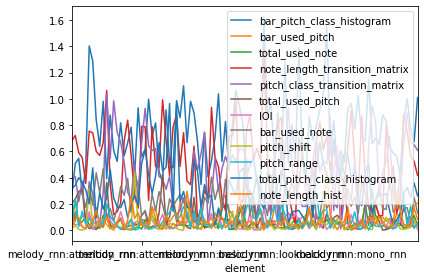

In [95]:
tmp_df = df_by_config.copy()

plt.figure()
fig, axs = plt.subplots(2, figsize=(28,8), sharex='col', sharey='row', dpi=150)
fig.suptitle('Impact of Input/Output Length Pair over Key Metrics')
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)

# print(tmp_df.columns)


suffix = '_avg'
suffix = ''
eval_metrics = ['time' + suffix] + [c for c in list(tmp_df.columns) if c.endswith('overlap' + suffix) or c.endswith('kl_div' + suffix)]
overlaps = [m for m in eval_metrics if m.endswith('overlap' + suffix)]
kl_divs  = [m for m in eval_metrics if m.endswith('kl_div' + suffix)]



metricsets = [ None
            , (overlaps, "Test")
            , (kl_divs, "Test")
            ][1:]

# Create Multiplot
a = plt.figure(dpi=150,figsize=(8,6))
fig, axs = plt.subplots(2, dpi=150,figsize=(10,8),sharex='col', sharey='row')
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)
plt.suptitle(title)
plt.xticks(rotation=90)



# Create Subplots
for i, (metricset, legend) in enumerate(metricsets):
    
    # Prepare Dataframe (Filter Columns)
    inner_df = tmp_df.copy()
    subset_df = inner_df[metricset + ['model', 'checkpoint']]
    subset_df['element'] = subset_df['model'].astype(str) + ':' + subset_df['checkpoint'].astype(str)
    subset_df.columns = filter_metric_names(subset_df.columns)
    inner_df.columns = filter_metric_names(inner_df.columns)
    metricset = filter_metric_names(metricset)

    # Calculate plot
    final_df = pd.DataFrame(subset_df, columns=metricset)
    final_df = pd.concat([final_df, subset_df['element']], axis=1)

    print(final_df.columns)
    ax[i].plot(x='element', y=metricset)

    # axs[i].plot(final_df[metricset])
    # axs[i].legend(title=legend, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

plt.show()
